In [1]:
#%run MChain.ipynb
import numpy as np
import graphviz as gv
from MChain import MChain 

# construct a Markov chain

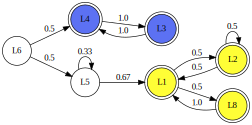

In [2]:
# building a chain using list of transitions and (unnormalized) probabilities

L10 = [(8,1,1),(1,8,1),(1,2,1),(2,1,1),(2,2,1),(3,4,1),(4,3,1),
       (5,5,1),(6,5,1),(6,4,1),(5,1,2)]

mc1 = MChain()
mc1.from_list(L10, prefix='L')
mc1.display(size=3.5) 

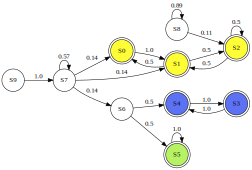

In [3]:
# building a chain using an (unnormalized) transition matrix

T10 = np.array([[0,1,0,0,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,1,1,0,0,0,0],[1,1,0,0,0,0,1,4,0,0],
                [0,0,1,0,0,0,0,0,8,0],[0,0,0,0,0,0,0,1,0,0]])

mc = MChain()
mc.from_matrix(T10, prefix='S')
mc.display(size=3.5) 

# information about the chain, classes and states

In [4]:
mc.list_chain()

[('S0', 'S1', 1.0),
 ('S1', 'S0', 0.5),
 ('S1', 'S2', 0.5),
 ('S2', 'S1', 0.5),
 ('S2', 'S2', 0.5),
 ('S3', 'S4', 1.0),
 ('S4', 'S3', 1.0),
 ('S5', 'S5', 1.0),
 ('S6', 'S4', 0.5),
 ('S6', 'S5', 0.5),
 ('S7', 'S0', 0.14285714285714285),
 ('S7', 'S1', 0.14285714285714285),
 ('S7', 'S6', 0.14285714285714285),
 ('S7', 'S7', 0.5714285714285714),
 ('S8', 'S2', 0.1111111111111111),
 ('S8', 'S8', 0.8888888888888888),
 ('S9', 'S7', 1.0)]

In [5]:
mc.list_classes()

{0: "['S6' 'S7' 'S8' 'S9']",
 1: "['S0' 'S1' 'S2']",
 2: "['S3' 'S4']",
 3: "['S5']"}

In [6]:
mc.list_states()

['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']

In [7]:
mc.info_class(1)

[('S0', 'S1', 1.0),
 ('S1', 'S0', 0.5),
 ('S1', 'S2', 0.5),
 ('S2', 'S1', 0.5),
 ('S2', 'S2', 0.5)]

In [8]:
mc.info_state('S7')

[('S9', 'S7', 1.0),
 ('S7', 'S0', 0.14285714285714285),
 ('S7', 'S6', 0.14285714285714285),
 ('S7', 'S1', 0.14285714285714285),
 ('S7', 'S7', 0.5714285714285714)]

# display of the chain, a class or a state

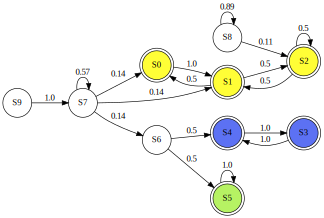

In [9]:
# recurrent classes are colored

mc.display()

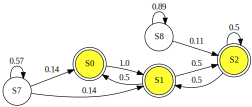

In [10]:
mc.display(classes=[1], size=3.5) # with neighbors

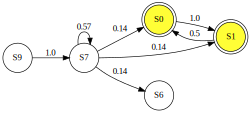

In [11]:
mc.display(states=['S7'], size=3.5) # with neighbors

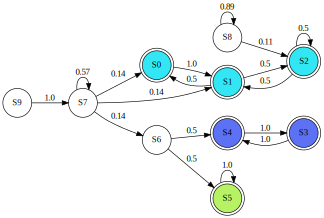

In [12]:
mc.color_class(1,15)
mc.display()

# add, delete, rename a state

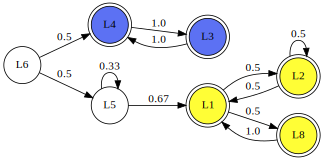

In [13]:
mc1.display()

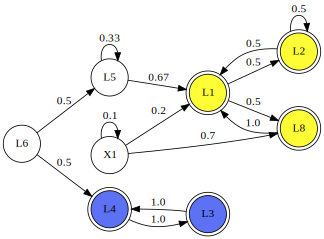

In [14]:
# add a state 

l = [('L1',0.2),('L8',0.7), ('X1', 0.1)]
mc1 = mc1.add_state('X1',l)
mc1.display()

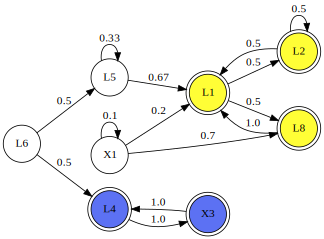

In [15]:
# rename a state 

mc1.rename_state('L3','X3')
mc1.display()

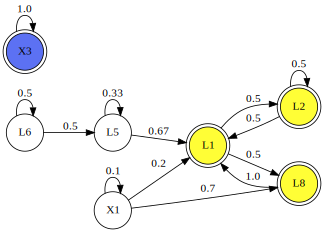

In [16]:
# delete a state, freed probability mass is assigned to originated states

mc1 = mc1.delete(states=['L4'], absorb=True)
mc1.display()

# delete or reduce classes

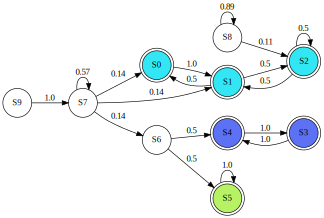

In [17]:
mc.display()

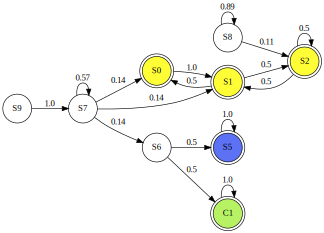

In [18]:
mc.reduce(classes=[2], name='C1').display()

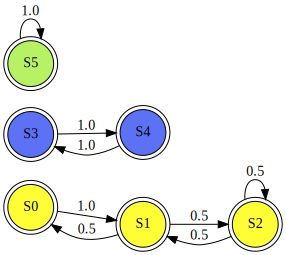

In [19]:
mc.delete(classes=[0]).display()

# change or delete a transition

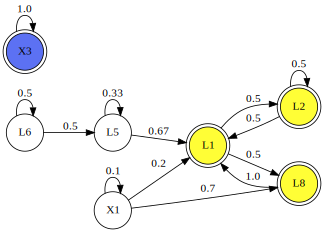

In [20]:
mc1.display()

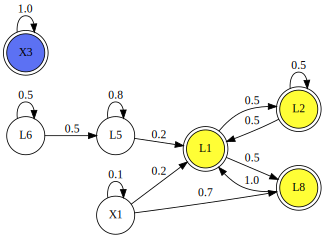

In [21]:
mc2 = mc1.change_transition('L5','L1',0.2)
mc2.display()

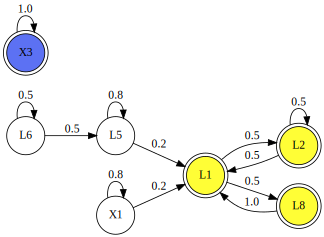

In [22]:
mc2.delete_transition('X1','L8').display()

# subchain or union of chains

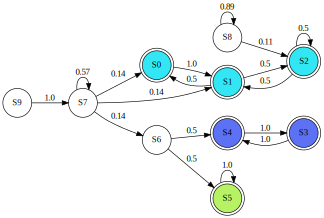

In [23]:
mc.display()

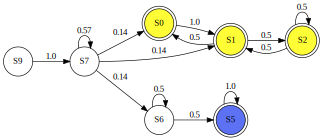

In [24]:
mc2 = mc.subchain(states=['S9','S7','S6'], classes=[1,3])
mc2.display()

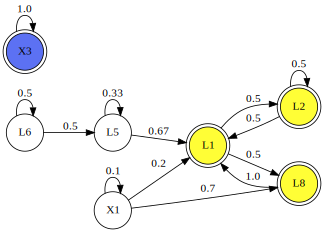

In [25]:
mc1.display()

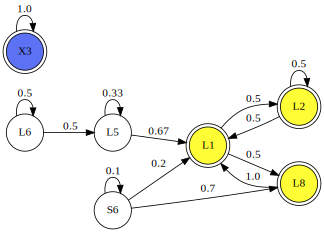

In [26]:
mc3 = mc1.rename_state('X1','S6')
mc3.display()

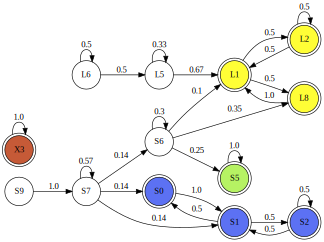

In [27]:
mc4 = mc2.union(mc3)
mc4.display()